In [27]:
import pandas as pd
import seaborn as sns
pd.set_option("display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.2f' % x)
# pd.reset_option('display.float_format')

In [28]:
df = pd.read_csv("features_selected_raw.csv").iloc[:,1:]
df.columns = df.columns.str.strip().str.lower()

In [29]:
df.head()

,address,flag,avg min between sent tnx,avg min between received tnx,time diff between first and last (mins),sent tnx,received tnx,number of created contracts,unique received from addresses,unique sent to addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,total transactions (including tnx to create contract,total ether sent,total ether received,total ether balance,total erc20 tnxs,erc20 total ether received,erc20 total ether sent,erc20 total ether sent contract,erc20 uniq sent addr,erc20 uniq rec addr,erc20 uniq sent addr.1,erc20 uniq rec contract addr,erc20 min val rec,erc20 max val rec,erc20 avg val rec,erc20 min val sent,erc20 max val sent,erc20 avg val sent,erc20 uniq sent token name,erc20 uniq rec token name,erc20 most sent token type,erc20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.00,45.81,6.59,0.00,31.22,1.20,810,865.69,586.47,-279.22,265.00,35588543.78,35603169.52,0.00,30.00,54.00,0.00,58.00,0.00,15000000.00,265586.15,0.00,16830998.35,271779.92,39.00,57.00,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.00,2.61,0.39,0.00,1.80,0.03,102,3.09,3.09,-0.00,8.00,403.43,2.26,0.00,1.00,5.00,0.00,7.00,0.00,365.00,57.63,2.26,2.26,2.26,1.00,7.00,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.11,1.17,0.36,0.05,3.54,1.79,12,3.59,3.59,0.00,8.00,521.51,0.00,0.00,0.00,7.00,0.00,8.00,0.00,442.82,65.19,0.00,0.00,0.00,0.00,8.00,None,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.00,500.00,99.49,0.00,450.00,70.00,34,1750.05,895.40,-854.65,14.00,17111.05,11412.23,0.00,2.00,11.00,0.00,11.00,0.00,11412.23,1555.55,100.00,9029.23,3804.08,1.00,11.00,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.00,12.80,2.67,0.00,9.00,0.02,4619,104.32,53.42,-50.90,42.00,162829.66,123539.93,0.00,4.00,23.00,0.00,27.00,0.00,90000.00,4934.23,0.00,45000.00,13726.66,6.00,27.00,StatusNetwork,EOS


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 38 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   address                                               9841 non-null   object 
 1   flag                                                  9841 non-null   int64  
 2   avg min between sent tnx                              9841 non-null   float64
 3   avg min between received tnx                          9841 non-null   float64
 4   time diff between first and last (mins)               9841 non-null   float64
 5   sent tnx                                              9841 non-null   int64  
 6   received tnx                                          9841 non-null   int64  
 7   number of created contracts                           9841 non-null   int64  
 8   unique received from addresses                        9841

### Data cleaning

In [31]:
df.columns = df.columns.str.lower()
df.drop_duplicates(subset=["address"], inplace=True)
df.drop(["address"], axis=1, inplace=True)

In [32]:
def erc20_missing_or_not(x):
    if x == "None":
        return 0 
    elif type(x) != str:
        return 0 
    elif len(x) < 1:
        return 0 
    else:
        return 1

In [33]:
df["erc20 most sent token type"] = df["erc20 most sent token type"].apply(erc20_missing_or_not)

In [34]:
df.rename(columns={'total transactions (including tnx to create contract':'total tnx',
                   'erc20_most_rec_token_type':'erc20 most rec token type',
                   'erc20 uniq sent addr.1':'erc20 uniq sent contract addr'}, inplace=True)

In [35]:
df["erc20 most rec token type"] = df["erc20 most rec token type"].apply(erc20_missing_or_not)

### For future - FE on privacy coins or coin type (DNF)

In [ ]:
dfcoins = pd.DataFrame(df.iloc[:,35:])

In [6]:
dfcoins.columns = ["coinsent","coinrec"]

In [7]:
pd.unique(dfcoins[['coinsent', 'coinrec']].values.ravel('K'))

array(['Cofoundit', 'Livepeer Token', 'None', 'Raiden', 'StatusNetwork',
       '0', 'TenXPay', nan, 'blockwell.ai KYC Casper Token', 'EOS', 'ICO',
       'bitqy', 'OmiseGO', 'SONM', 'BAT', 'Melon', 'Friendz Coin',
       'FunFair', 'MKR', 'Golem', 'AION', 'Aragon', 'TokenCard',
       'Crypto.com', 'CRYPTOPUNKS', 'Aigang', 'Bancor', 'ZRX',
       'PangeaCoinICO', 'VeChain', 'Decentraland', 'Mysterium', 'Dochain',
       'SwarmCity', 'BNB', 'Humaniq', 'DGD', 'Storm', 'Patientory',
       'NapoleonX', 'Nexium', 'Qtum', 'district0x', 'Bytom',
       'Identity Hub Token', 'Celsius', 'Reputation', 'Tronix',
       'ViteToken', 'Poker Chips', 'MEX', 'Salt', 'Edgeless', 'SAN',
       'TheDAO', 'Telcoin', 'EduCoin', 'DICE', 'Trustcoin', 'Tokenomy',
       'Veritaseum', 'Time New Bank', 'NimiqNetwork', 'Kin', 'UG Token',
       'SNGLS', 'BlockchainPoland', 'Monetha', 'Propy', 'Republic',
       'Civic', 'Storj', 'Loom', 'DATAcoin', 'ChainLink Token',
       'Ether Token', 'Guaranteed Entrance 

In [8]:
dferc = df.iloc[:,20:35]
dfeth = df.iloc[:,:20]

In [9]:
dferc["FLAG"] = df["FLAG"]

### FE: Sent - Received

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


9841

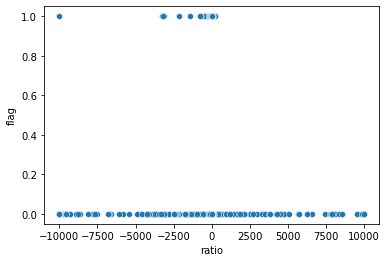

In [13]:
tnxratio = pd.DataFrame(df["Senttnx"]-df["ReceivedTnx"])
tnxratio["FLAG"] = df["FLAG"]
tnxratio.columns = ["ratio", "flag"]
tnxratio.fillna(0, axis=1, inplace=True)
tnxratio.replace([np.inf, -np.inf], 0, inplace=True)
# sns.distplot(tnxratio, bins=1000, kde=False)
sns.scatterplot(tnxratio["ratio"], tnxratio["flag"])
# tnxratio.sort_values("ratio",ascending=False).head(50)
len(tnxratio.ratio)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


9841

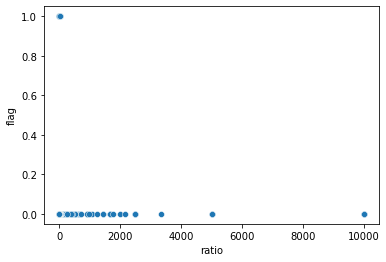

In [15]:
tnxratio = pd.DataFrame(df["Senttnx"]/df["ReceivedTnx"])
tnxratio["FLAG"] = df["FLAG"]
tnxratio.columns = ["ratio", "flag"]
tnxratio.fillna(0, axis=1, inplace=True)
tnxratio.replace([np.inf, -np.inf], 0, inplace=True)
# sns.distplot(tnxratio, bins=1000, kde=False)
sns.scatterplot(tnxratio["ratio"], tnxratio["flag"])
# tnxratio.sort_values("ratio",ascending=False).head(50)
len(tnxratio.ratio)

In [36]:
df["sent rec balance"] = tnxratio["ratio"]

In [37]:
df.head()

,flag,avg min between sent tnx,avg min between received tnx,time diff between first and last (mins),sent tnx,received tnx,number of created contracts,unique received from addresses,unique sent to addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,total tnx,total ether sent,total ether received,total ether balance,total erc20 tnxs,erc20 total ether received,erc20 total ether sent,erc20 total ether sent contract,erc20 uniq sent addr,erc20 uniq rec addr,erc20 uniq sent contract addr,erc20 uniq rec contract addr,erc20 min val rec,erc20 max val rec,erc20 avg val rec,erc20 min val sent,erc20 max val sent,erc20 avg val sent,erc20 uniq sent token name,erc20 uniq rec token name,erc20 most sent token type,erc20 most rec token type,sent rec balance
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.00,45.81,6.59,0.00,31.22,1.20,810,865.69,586.47,-279.22,265.00,35588543.78,35603169.52,0.00,30.00,54.00,0.00,58.00,0.00,15000000.00,265586.15,0.00,16830998.35,271779.92,39.00,57.00,1,1,8.10
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.00,2.61,0.39,0.00,1.80,0.03,102,3.09,3.09,-0.00,8.00,403.43,2.26,0.00,1.00,5.00,0.00,7.00,0.00,365.00,57.63,2.26,2.26,2.26,1.00,7.00,1,1,11.75
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.11,1.17,0.36,0.05,3.54,1.79,12,3.59,3.59,0.00,8.00,521.51,0.00,0.00,0.00,7.00,0.00,8.00,0.00,442.82,65.19,0.00,0.00,0.00,0.00,8.00,0,1,0.20
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.00,500.00,99.49,0.00,450.00,70.00,34,1750.05,895.40,-854.65,14.00,17111.05,11412.23,0.00,2.00,11.00,0.00,11.00,0.00,11412.23,1555.55,100.00,9029.23,3804.08,1.00,11.00,1,1,2.78
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.00,12.80,2.67,0.00,9.00,0.02,4619,104.32,53.42,-50.90,42.00,162829.66,123539.93,0.00,4.00,23.00,0.00,27.00,0.00,90000.00,4934.23,0.00,45000.00,13726.66,6.00,27.00,1,1,229.90


In [38]:
df.to_csv("features_clean.csv")